# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [34]:
def calc_slope(xs,ys):
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    combined_mean = np.mean(xs * ys)
    return ((x_mean*y_mean) - combined_mean) / (x_mean**2 - np.mean(xs**2))

def best_fit(xs,ys):
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    return m, c

m, c = best_fit(X, Y)

In [8]:
def reg_line (m, c, xs):
    return [(m*x) + c for x in xs]
regression_line = reg_line(m, c, X)

def sq_err(y_a, y_b):
    """
    input
    y_a : true y values
    y_b : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    squared_error = 0
    for i in range(0, len(y_a)):
        squared_error += (y_a[i] - y_b[i]) ** 2
    return squared_error

def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    num = sq_err(y_real, y_predicted)
    den = 0
    for i in y_real:
        den += (i - y_real.mean()) ** 2
    return 1 - (num / den)
r_squared(Y, regression_line)

0.9715335169880626

In [9]:
print(m, c)
print(r_squared(Y, regression_line))

0.5575757575757568 6.3333333333333375
0.9715335169880626


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


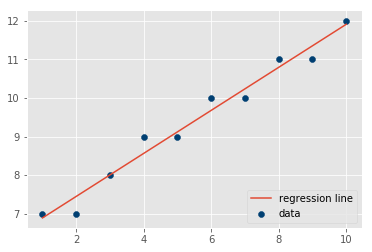

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

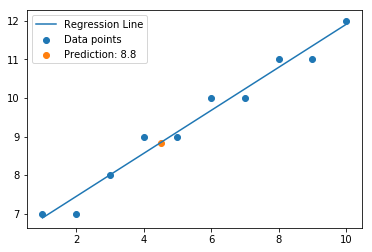

In [12]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x_new = 4.5
y_predicted = (m*x_new) + c

plt.scatter(X, Y, label = 'Data points')
plt.plot(X, regression_line, label = 'Regression Line')
plt.scatter(x_new, y_predicted, label = 'Prediction: ' + str(round(y_predicted, 1)))
plt.legend()
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [14]:
import pandas as pd
df = pd.read_csv('heightweight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


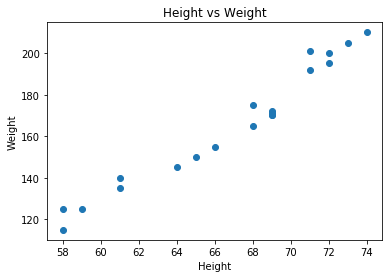

In [30]:
X = df['height']
Y = df['weight']
plt.scatter(X, Y)
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [43]:
m, c = best_fit(X, Y)
m, c

(5.539019232705614, -204.48343570637024)

In [44]:
regression_line = reg_line(m, c, x)
x_new = 65
y_predicted = (m*x_new) + c

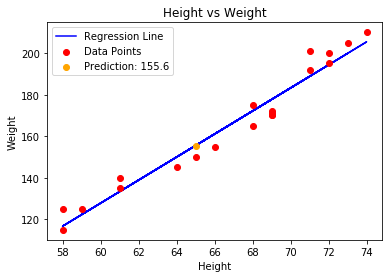

Regression Data:
------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
------------
Model: Y = 5.54 * X + -204.48


In [50]:
plt.scatter(x, y, label = 'Data Points', c='r')
plt.plot(x, regression_line, c = 'b', label = 'Regression Line', zorder = 0)
plt.scatter(x_new, y_predicted, c='orange', label = 'Prediction: ' + str(round(y_predicted, 1)))
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()
print(f'Regression Data:\n------------\nSlope: {round(m, 2)}\nY-Intercept: {round(c, 2)}\nR-Squared: {round(r_squared(y, regression_line), 2)}\n------------\nModel: Y = {round(m, 2)} * X + {round(c, 2)}')